In [96]:
import sys
sys.path.append('..')
import re

In [97]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.load_data import load_dataset
import shap
import seaborn as sns

In [98]:
X_train, y_train, X_test, y_test = load_dataset()

LOAD DATASETS

:
Subject1
Round1 (2887, 152)
Round2 (2775, 152)
round3 (2498, 152)
       MAV1      MAV2      MAV3      MAV4      MAV5      MAV6      MAV7  \
0  0.020667  0.009256  0.007302  0.010696  0.048411  0.015565  0.013566   
1  0.020849  0.013591  0.014533  0.067708  0.104390  0.021633  0.026315   
2  0.013649  0.086738  0.025212  0.034016  0.042743  0.039416  0.018589   
3  0.010048  0.005960  0.006307  0.043353  0.066057  0.012944  0.024288   
4  0.072935  0.026458  0.024038  0.086573  0.157180  0.052219  0.029555   

       MAV8      MAV9     MAV10  ...    SKEW3     SKEW4    SKEW5    SKEW6  \
0  0.019455  0.019438  0.020109  ... -0.76883 -0.025066  0.76225 -0.42704   
1  0.044802  0.076000  0.008759  ...  0.17702  0.163200  0.22069  0.14271   
2  0.047252  0.061444  0.012353  ... -0.19943 -0.151700 -1.06920  0.16618   
3  0.030835  0.047647  0.006491  ...  0.19418  0.007295  0.13828  0.37693   
4  0.027389  0.231640  0.062172  ... -0.49456 -0.141540  0.10471  0.28199   

   

In [115]:
num_pat=11
shap_extratrees=[]
shap_means=[]
shap_variances=[]
for pat in range(num_pat):
    file_path = 'C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_ExtremelyRandomizedTrees_patient_{}_tmp.pkl'.format(pat)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_extratrees.append(shap_values)
    shap_mean=pd.DataFrame(columns=shap_values[0].columns.values)
    shap_variance=pd.DataFrame(columns=shap_values[0].columns.values)
    for i in range(8):
        tmp=shap_values[i].abs()
        shap_mean.loc[i]=tmp.mean(axis=0)
        shap_variance.loc[i]=tmp.var(axis=0)
    shap_means.append((shap_mean))
    shap_variances.append(shap_variance)

In [116]:
print(len(shap_extratrees))
print(len(shap_extratrees[0]))
print(shap_extratrees[0][0].shape)
print(len(shap_means))
print(shap_means[0].shape)
print(shap_means[0]["HP_M1"])
print(shap_means[0]["RMS7"])
print(len(shap_variances))
#print(shap_variance_patients[0])

11
8
(3297, 90)
11
(8, 90)
0    0.017687
1    0.005887
2    0.010090
3    0.010108
4    0.004819
5    0.004422
6    0.001143
7    0.008577
Name: HP_M1, dtype: float64
0    0.010573
1    0.013030
2    0.009946
3    0.005153
4    0.003822
5    0.014635
6    0.013075
7    0.012467
Name: RMS7, dtype: float64
11


In [142]:
mean_shap=sum(shap_means)/len(shap_means)
var_shap=sum((i - mean_shap) ** 2 for i in shap_means) / len(shap_means) 
#print(mean_shap.head())
#print(var_shap.head())
print(var_shap.max)

<bound method DataFrame.max of        MAV1      MAV2          MAV3      MAV4          MAV5          MAV6  \
0  0.000008  0.000021  2.413712e-06  0.000010  8.704199e-07  5.689052e-07   
1  0.000005  0.000001  1.455579e-06  0.000029  2.003975e-05  2.102923e-06   
2  0.000002  0.000008  1.761915e-06  0.000005  1.446663e-06  4.593544e-06   
3  0.000002  0.000028  5.646871e-06  0.000008  1.984357e-05  7.144449e-06   
4  0.000015  0.000003  1.375949e-06  0.000020  2.469461e-06  7.970448e-06   
5  0.000005  0.000004  1.832218e-06  0.000004  9.611298e-07  1.500088e-05   
6  0.000007  0.000004  4.982815e-06  0.000011  1.041157e-06  1.362564e-05   
7  0.000003  0.000002  9.516997e-07  0.000014  4.589354e-06  2.110695e-05   

       MAV7      MAV8      MAV9     MAV10  ...     IEMG1     IEMG2  \
0  0.000005  0.000009  0.000002  0.000009  ...  0.000004  0.000022   
1  0.000003  0.000002  0.000007  0.000006  ...  0.000002  0.000001   
2  0.000003  0.000007  0.000005  0.000002  ...  0.000001  0.00000

In [131]:
feature=mean_shap.columns.values.copy()
channel=mean_shap.columns.values.copy()
for index in range(len(val)):
    feature[index]=''.join([i for i in feature[index] if not i.isdigit()])
    channel[index]=''.join([i for i in channel[index] if i.isdigit()])
print(feature)
print(channel)

['MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'ZC' 'ZC'
 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'SSC' 'SSC' 'SSC' 'SSC' 'SSC'
 'SSC' 'SSC' 'SSC' 'SSC' 'SSC' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL'
 'WL' 'WL' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A'
 'HP_A' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M'
 'HP_M' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C'
 'HP_C' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'IEMG'
 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8'
 '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4'
 '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10']


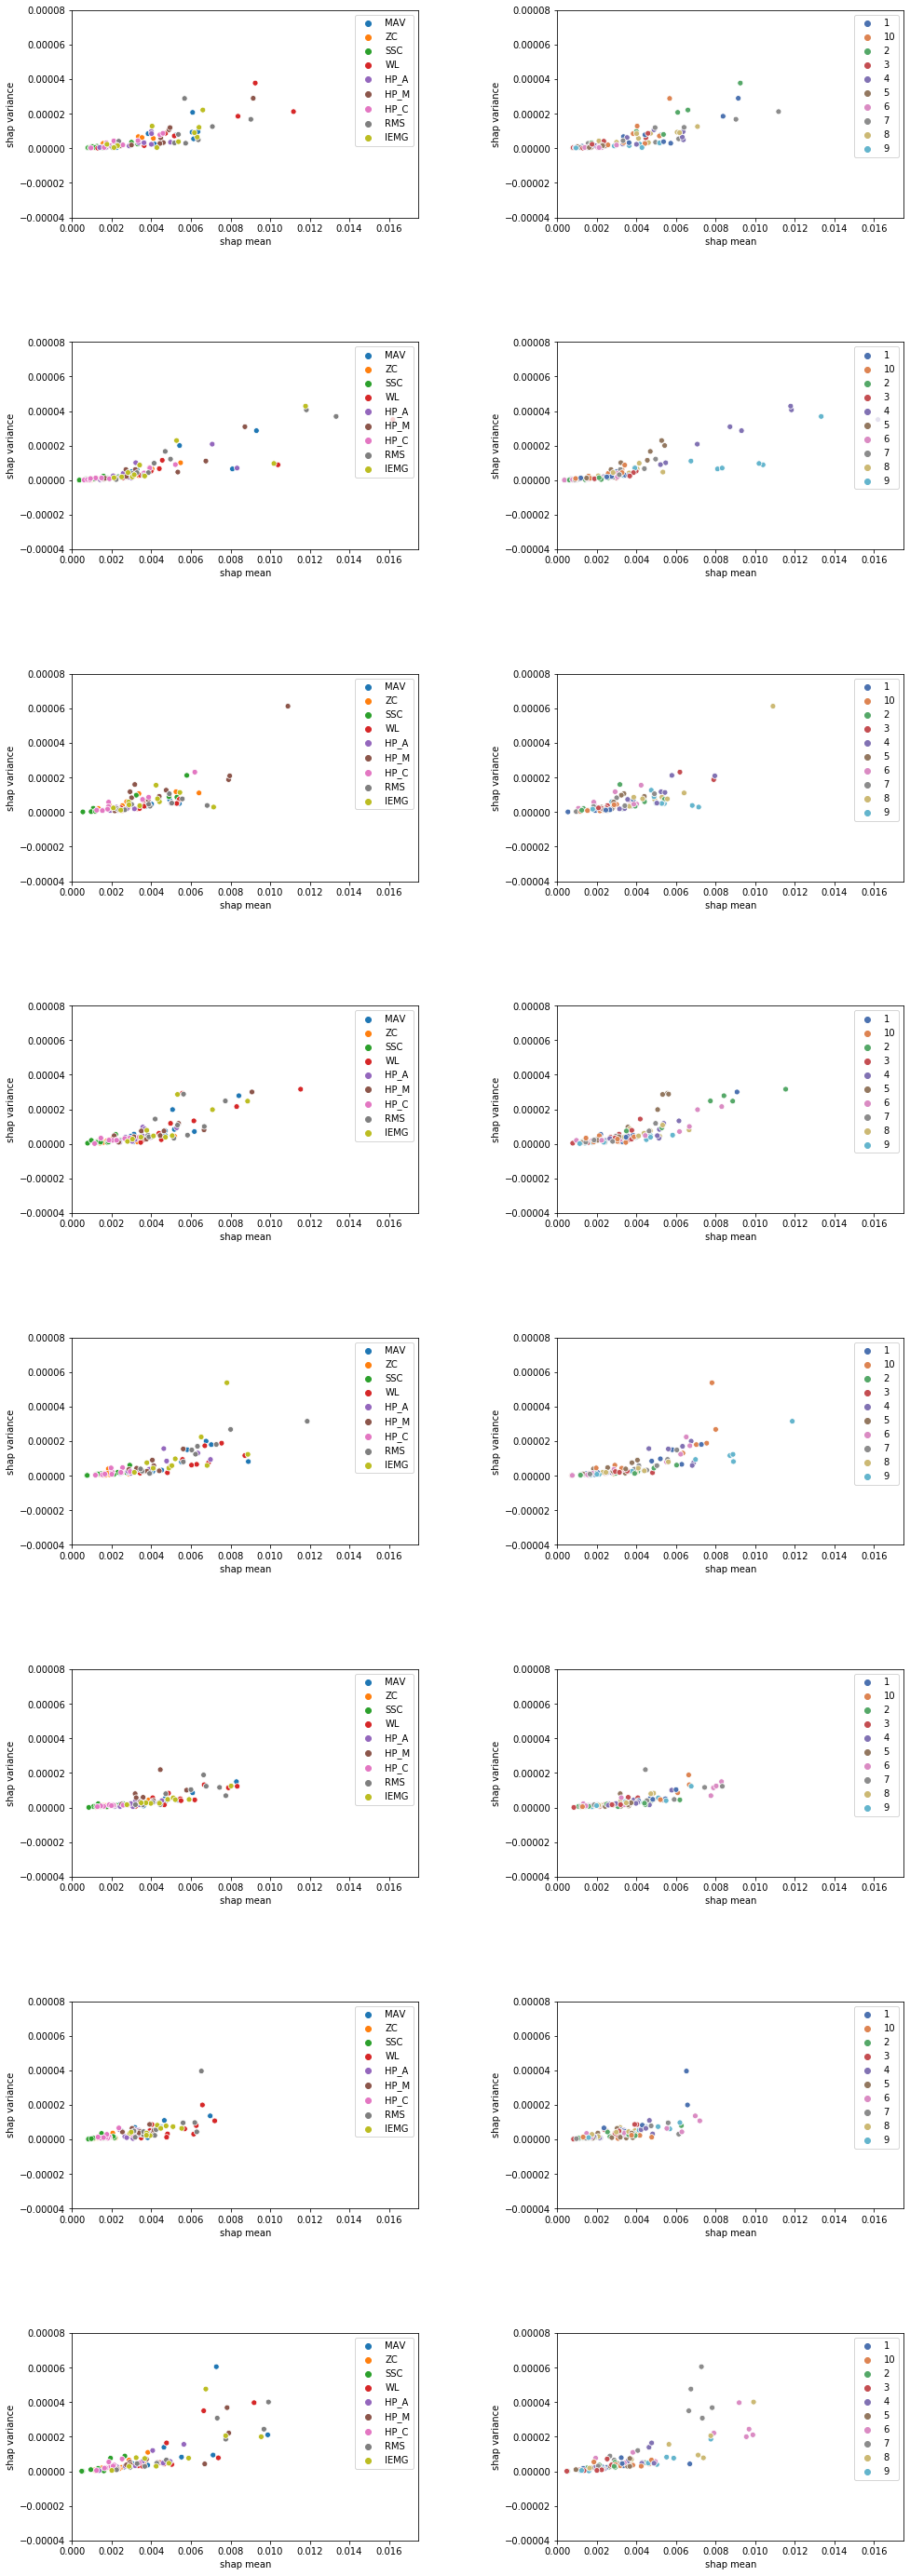

In [149]:
heigth=8;
width=2;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(8):
    sns.scatterplot(x=mean_shap.iloc[i], y=((var_shap.iloc[i])), hue=feature, legend="full", ax=axes[i,0])
    axes[i,0].set(ylim=(-0.00004, 0.00008))
    axes[i,0].set(xlim=(0,0.0175))
    axes[i,0].set(xlabel='shap mean', ylabel='shap variance')
    
    sns.scatterplot(x=mean_shap.iloc[i], y=((var_shap.iloc[i])), hue=channel, legend="full", ax=axes[i,1], palette="deep")
    axes[i,1].set(ylim=(-0.00004, 0.00008))
    axes[i,1].set(xlim=(0,0.0175))
    axes[i,1].set(xlabel='shap mean', ylabel='shap variance')


# PROVE


In [5]:
num_pat=11
shap_LDA=[]
shap_means_patients=[]
for pat in range(num_pat):
    file_path = 'C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_ExtremelyRandomizedTrees_patient_{}_tmp.pkl'.format(pat)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_LDA.append(shap_values)

    #print(len(shap_values))
    #print(shap_values[0])
    #plt.figure()
    #plt.imshow(shap_values[0], cmap='jet', aspect='auto', alpha=0.5)
    #plt.show()
    shap_mean=pd.DataFrame(columns=shap_values[0].columns.values)
    for i in range(8):
        tmp=shap_values[i].abs()
        shap_mean.loc[i]=tmp.mean(axis=0)
    shap_means_patients.append((shap_mean))

In [6]:
class_0=[]
for patient in range(num_pat):
    id_max_tot=shap_means_patients[patient].mean(axis=0).argmax()
    print("tot patient", patient, ":", id_max_tot, shap_means_patients[patient].columns[id_max_tot])
    
    for index in range(8):
        id_max=shap_means_patients[patient].iloc[index,:].argmax()
        
        print(index, ":",  shap_means_patients[patient].columns[id_max], id_max, "max", np.max(shap_means_patients[patient].iloc[index,:]))

class_0=["HP_M1", "RMS7", "WL1", "WL2", "RMS10", "MAV4", "WL7"]

tot patient 0 : 76 RMS7
0 : HP_M1 50 max 0.01768661355762631
1 : RMS9 78 max 0.013874768217138699
2 : HP_M8 57 max 0.01593280292314432
3 : MAV2 1 max 0.01699750583134554
4 : WL10 39 max 0.016854364323343567
5 : HP_M7 56 max 0.018308397699624647
6 : RMS7 76 max 0.013075481179662882
7 : HP_M7 56 max 0.018508700148581077
tot patient 1 : 53 HP_M4
0 : RMS7 76 max 0.017391100432676464
1 : HP_M4 53 max 0.01623234230218717
2 : HP_M2 51 max 0.014664165472705201
3 : HP_M1 50 max 0.018598242683208612
4 : HP_M4 53 max 0.01666884408386924
5 : IEMG6 85 max 0.013786117344210057
6 : RMS9 78 max 0.012380191997116995
7 : HP_M7 56 max 0.018775973296981042
tot patient 2 : 77 RMS8
0 : WL1 30 max 0.01496984009399963
1 : WL4 33 max 0.02253981151170522
2 : HP_M3 52 max 0.012755274978181784
3 : WL4 33 max 0.014534411839627278
4 : WL4 33 max 0.011091913528426778
5 : WL3 32 max 0.010142621565641281
6 : HP_M3 52 max 0.011694218154064776
7 : RMS8 77 max 0.024656579885459034
tot patient 3 : 85 IEMG6
0 : HP_M1 50 ma

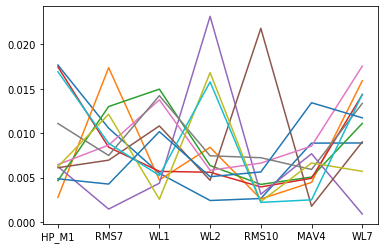

In [7]:
plt.figure()
for patient in range(num_pat):
    
    vect=shap_means_patients[patient].loc[0,class_0]
    plt.plot(vect)
plt.show()

<class 'list'>
8
[[-6.18876259e-03  1.07851479e-03 -1.21089646e-03 ... -5.15738002e-04
  -5.35010050e-03 -2.22030426e-03]
 [ 1.38750252e-03  1.38811997e-03  4.13515556e-04 ... -2.28159039e-03
  -1.72022967e-03  3.92693063e-03]
 [-3.41282275e-03 -1.71721428e-03 -3.85663273e-04 ... -7.12032306e-04
   9.68078610e-04 -1.98760116e-03]
 ...
 [-6.23139202e-05  9.22198066e-04  5.86958540e-04 ... -1.89411013e-03
  -3.87029547e-05 -2.93501314e-03]
 [ 3.63330197e-03 -3.22779272e-03 -6.03517532e-04 ...  5.71845182e-04
  -6.01718170e-03 -1.07583894e-02]
 [-9.97412095e-04 -1.22493610e-03  9.04256734e-04 ...  1.23328866e-03
   4.75907587e-03 -5.30156879e-03]]


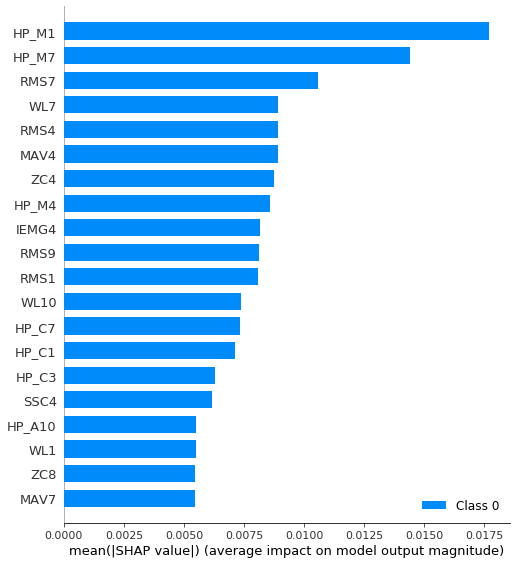

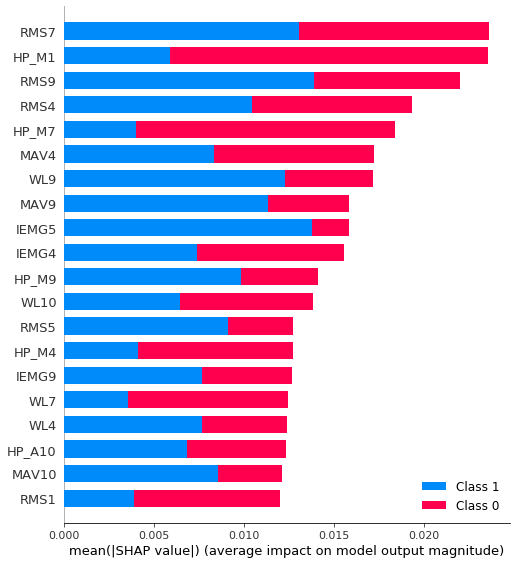

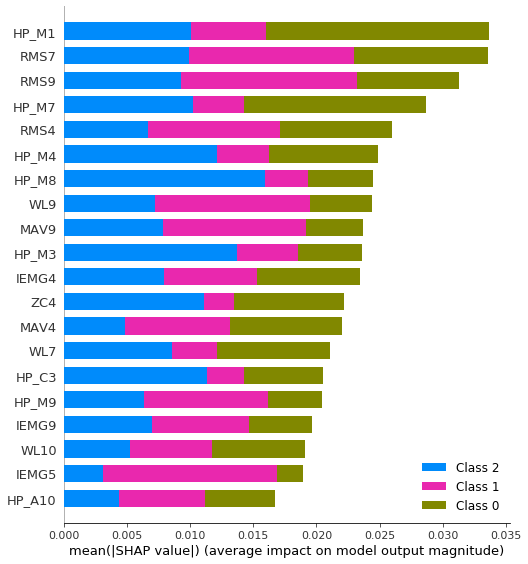

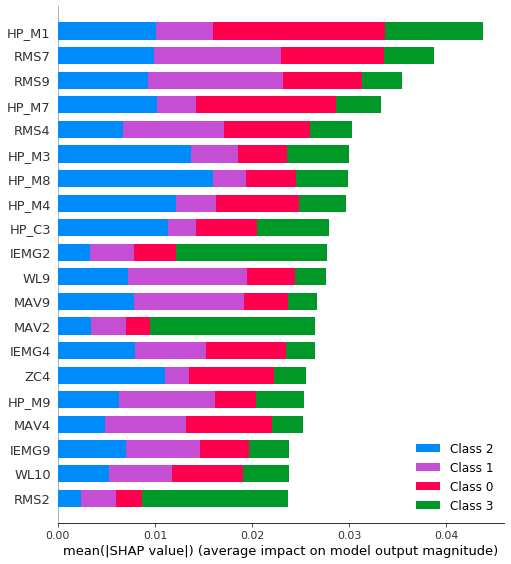

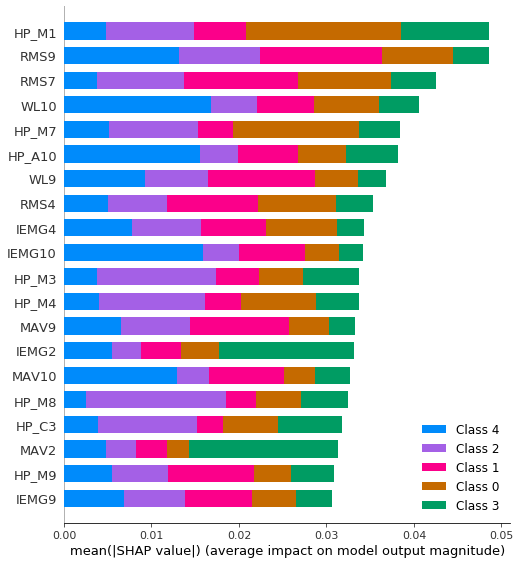

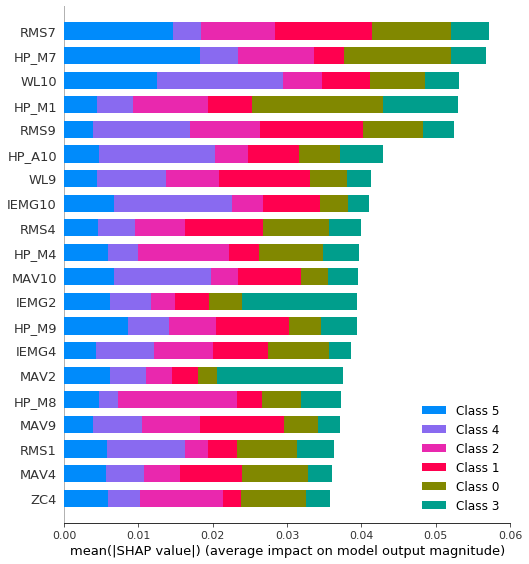

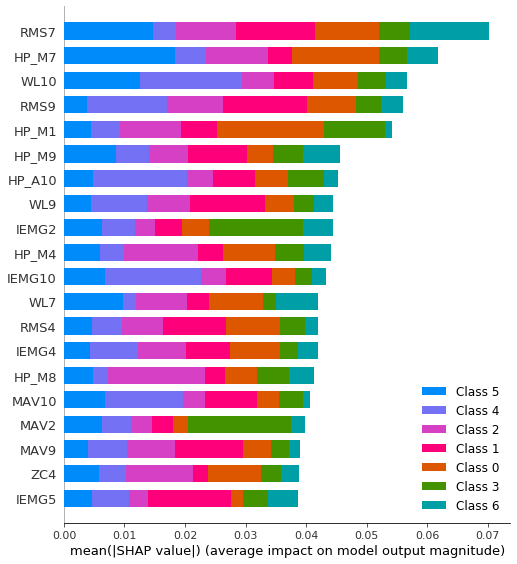

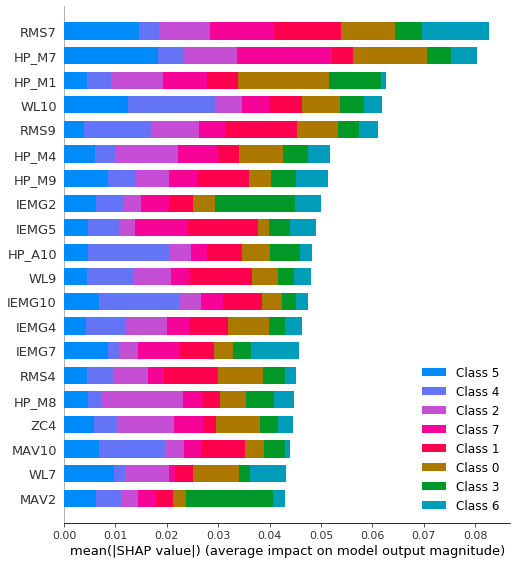

In [130]:
num_pat=11
shap_LDA=[]
shap_means_patients=[]
file_path = 'C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_ExtremelyRandomizedTrees_patient_{}_tmp.pkl'.format(0)
with open(file_path, 'rb') as f:
    shap_values = pickle.load(f)

print(type(shap_values))
print(len(shap_values))
print((shap_values[0].values))
shap_list=[]
for index in range(8):
    shap_list.append(shap_values[index].values)
    plt.figure()
    shap.summary_plot(shap_list, X_test[patient], plot_type="bar", show=False)

In [38]:
shap_means_patients[patient].sum(axis=0).argmax()

41

<function matplotlib.pyplot.show(*args, **kw)>

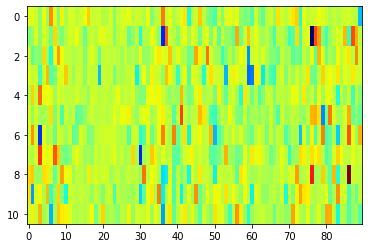

In [86]:
class_0=np.zeros([11,90])
for patient in range(num_pat):
    class_0[patient,:]=shap_means_patients[patient].iloc[0,:]

plt.figure()
plt.imshow(class_0, cmap='jet', aspect='auto')
plt.show

In [ ]:
class_1=np.zeros([11,90])
for patient in range(num_pat):
    class_1[patient,:]=shap_means_patients[patient].iloc[1,:]

plt.figure()
plt.imshow(class_1, cmap='jet', aspect='auto')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

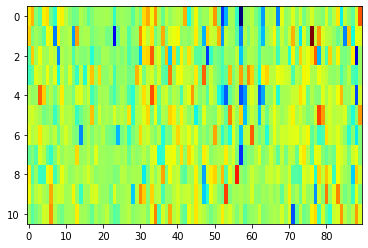

In [88]:
class_2=np.zeros([11,90])
for patient in range(num_pat):
    class_2[patient,:]=shap_means_patients[patient].iloc[2,:]

plt.figure()
plt.imshow(class_2, cmap='jet', aspect='auto')
plt.show

In [46]:
(shap_means_patients[0].iloc[0,:])

MAV1     -0.006286
MAV2     -0.004402
MAV3      0.000213
MAV4      0.002916
MAV5      0.000026
            ...   
IEMG6     0.001863
IEMG7    -0.005318
IEMG8     0.004237
IEMG9    -0.000004
IEMG10   -0.000790
Name: 0, Length: 90, dtype: float64

In [49]:
type(shap_means_patients[0].iloc[0,:])

pandas.core.series.Series

In [56]:
np.mean(shap_means_patients[0].iloc[0,:].values-shap_means_patients[1].iloc[0,:].values)


0.0002965231899832905

In [57]:
np.mean(shap_means_patients[0].iloc[0,:].values-shap_means_patients[0].iloc[1,:].values)


-0.0003094538292026214

In [58]:
np.mean(shap_means_patients[0].iloc[0,:].values-shap_means_patients[0].iloc[2,:].values)


0.0007606402871822023

In [59]:
np.mean(shap_means_patients[0].iloc[0,:].values-shap_means_patients[2].iloc[0,:].values)


-0.00014835870953122313